## Section 1:
Defining Functions

### (i) Load Dependencies

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2
import sys

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

import seaborn as sns
import numpy as np
import pandas as pd 

### (ii) Data Preprocessing

#### Q1:
1) **data_preparation():**
* load the cifar10 dataset
* encode target values using one-hot encoding
* return returns train and test components - X_train, Y_train, X_test, and Y_test

2) **normalize():**
* accepts the training and testing data as input arguments
* normalize data to range 0-1
* return normalized images

### (iii)  Defining the CNN Model
Read the following links to learn about 
* kernel initializers
 * https://keras.io/api/layers/initializers/
 * https://www.tensorflow.org/api_docs/python/tf/keras/initializers
* kernel regularizers
 * https://keras.io/api/layers/regularizers/
 * https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

#### Q2: 

3) **define_seq_model_1():**
* Add the following layers to build a simple sequential model using the following spec: (i) activation function - ReLu, (ii) padding to retain the shape of the input, (iii) kernal initialiser - he_uniform, (iv) weight regularizer = l2 with weighting = 0.001 and (iv) kernal size - 3x3. Finally, complile the models using 'nadam' optimizer, appropriate loss function and accuracy metric.
 * Conv2D layer - 32 channels  
 * Conv2D layer - 32 channels
 * MaxPooling layer, pad = 2
 * Flattening layer
 * Dense layer with 128 neurons
 * Dense Output layer with 10 softmax neurons

4) **define_seq_model_2():**
* Add the following layers to build a simple sequential model using the same spec: as in model_1.
 * Conv2D layer - 32 channels  
 * Conv2D layer - 32 channels
 * MaxPooling layer, pad = 2
 * Conv2D layer - 64 channels
 * Conv2D layer - 64 channels    
 * MaxPooling layer, pad = 2
 * Conv2D layer - 128 channels
 * Conv2D layer - 128 channels  
 * Flattening layer
 * Dense layer with 128 neurons
 * Dense Output layer with 10 softmax neurons

5) **define_seq_model_3():**
* Add the following layers to build a simple sequential model using the same spec: as in model_1.
 * Conv2D layer - 32 channels  
 * Conv2D layer - 32 channels
 * MaxPooling layer, pad = 2
 * Conv2D layer - 64 channels
 * Conv2D layer - 64 channels    
 * MaxPooling layer, pad = 2
 * Conv2D layer - 128 channels
 * Conv2D layer - 128 channels  
 * MaxPooling layer, pad = 2
 * Flattening layer
 * Dense layer with 128 neurons
 * Dense Output layer with 10 softmax neurons

6) **Print all the model summaries and summarize how the number of parameters are computed?**

##Section 2:

### (iii) Evaluating the model


#### Q3:
7)
* Step 1:
 * Call the functions defined in Section 1 to load the dataset, prepare the data, and define model_1.
 * Fit the model_1 defined above (Identify optimal number of epochs and batch-sizes) and evaluate it by printing the model accuracy.
* Repeat Step 1 for model_2 and model_3.
* Compare the accuracies of the three models and record your observations.

### (iv) Visualization of loss and accuracy


#### Q4:
8) **visualize_loss_accuracy():**
* Create 2 plots showing the (i) cross-entropy loss and (ii) classification accuracies for training vs. testing data sets of the three models.
* Record your observations about the three models showing how efficient the models are and the plots of and your knowledge gain.

In [2]:
# function to load the data, preprocess it. Operations such as normalization, resizing for the third cnn to accomodate the extra max pooling layer.
def data_loader():
  (x_train, y_train), (x_test, y_test) = cifar10.load_data() # loading data

  y_train = y_train.flatten() # flattening
  y_test = y_test.flatten()

  x_train = tf.convert_to_tensor(x_train, dtype=tf.float32) # conversion to tensor
  x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
  y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
  y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

  lb = LabelBinarizer() # One Hot Encoding
  y_train = lb.fit_transform(y_train)
  y_test = lb.transform(y_test)

  x_train = x_train[:2500] # reducing datasets to reduce runtime
  y_train = y_train[:2500]
  x_test = x_test[:2000]
  y_test = y_test[:2000]
  x_train = x_train/255
  x_test = x_test/255
  x_train_resize = tf.image.resize(x_train[:2500], (224, 224))
  x_test_resize = tf.image.resize(x_test[:2000], (224, 224))
  y_train_resize = y_train[:2500]
  y_test_resize = y_test[:2000]

  print("Data shape: \nx_train: {}\ny_train: {}\nx_test: {}\ny_test: {}\nx_train_resize: {}\nx_test_resize: {}\ny_train_resize: {}\ny_test_resize: {}\n"
          .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_train_resize.shape, x_test_resize.shape, y_train_resize.shape, y_test_resize.shape))
  
  return x_train, y_train, x_test, y_test, x_train_resize, x_test_resize, y_train_resize, y_test_resize

In [3]:
def define_seq_model_1(): # model 1
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.01),input_shape=(32, 32, 3)))

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

  model.add(MaxPooling2D(pool_size=(2, 2))) #dimensionality reduction - stride will also be 2 x 2

  model.add(Flatten()) #many dim output result from 2 layer and pass it to the next layer

  model.add(Dense(128, activation='relu'))

  model.add(Dense(10, activation='softmax'))
  model.summary()
  return model


def define_seq_model_2(): # model 2

  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),kernel_initializer='he_uniform',
                  kernel_regularizer=l2(0.01),
                  activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #dimensionality reduction - stride will also be 2 x 2

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

  model.add(MaxPooling2D(pool_size=(2, 2))) #dimensionality reduction - stride will also be 2 x 2

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

  model.add(Flatten()) #many dim output result from 2 layer and pass it to the next layer

  model.add(Dense(128, activation='relu'))

  model.add(Dense(10, activation='softmax'))
  model.summary()

  return model

def define_seq_model_3(): # model 3 
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3),kernel_initializer='he_uniform',
                  kernel_regularizer=l2(0.01),
                  activation='relu', input_shape=(224, 224, 3)))


  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2)))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2)))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2)))

  model.add(Flatten()) #many dim output result from 2 layer and pass it to the next layer

  model.add(Dense(128, activation='relu'))

  model.add(Dense(10, activation='softmax'))
  model.summary()

  return model

In [4]:
def executor(model_initializer, x_train, y_train, x_test, y_test): # executor function to initialize model, compile and fit
  batch_size = 32
  num_classes = 10
  epochs = 20

  model = model_initializer
  opt = SGD(lr = 0.01)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (x_test, y_test))

  visualizer(history, model, x_test, y_test)

In [5]:
def visualizer(history, model, x_test, y_test): # visualization function
  fig, ax = plt.subplots(2,1)
  ax[0].plot(history.history['loss'], color='b', label="Training Loss")
  ax[0].plot(history.history['val_loss'], color='r', label="Test Loss")
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r', label="Test Accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  # Predict the values from the validation dataset
  y_pred = model.predict(x_test)
  # Convert predictions classes to one hot vectors 
  y_pred_classes = np.argmax(y_pred,axis = 1) 
  # Convert validation observations to one hot vectors
  y_true = np.argmax(y_test,axis = 1)
  # compute the confusion matrix
  confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

  plt.figure(figsize=(12, 9))
  c = sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [6]:
x_train, y_train, x_test, y_test, x_train_resize, x_test_resize, y_train_resize, y_test_resize = data_loader()

170508288/170498071 [==============================] - 3s 0us/step
Data shape: 
x_train: (2500, 32, 32, 3)
y_train: (2500, 10)
x_test: (2000, 32, 32, 3)
y_test: (2000, 10)
x_train_resize: (2500, 224, 224, 3)
x_test_resize: (2000, 224, 224, 3)
y_train_resize: (2500, 10)
y_test_resize: (2000, 10)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
79/79 [==============================] - 12s 10ms/step - loss: 2.8752 - accuracy: 0.1464 - val_loss: 2.9655 - val_accuracy: 0.1290
Epoch 2/20
79/79 [==============================] - 0s 6ms/step - loss: 2.7196 - accuracy: 0.2172 - val_loss: 3.9128 - val_accuracy: 0.1085
Epoch 3/20
79/79 [==============================] - 0s 6ms/step - loss: 2.6121 - accuracy: 0.2724 - val_loss: 2.9358 - val_accuracy: 0.1760
Epoch 4/20
79/79 [==============================] - 1s 8ms/step - loss: 2.4985 - accuracy: 0.3168 - val_loss: 2.8400 - val_accuracy: 0.1855
Epoch 5/20
79/79 [==============================] - 1s 8ms/step - loss: 2.4160 - accuracy: 0.3328 - val_loss: 2.6045 - val_accuracy: 0.2605
Epoch 6/20
79/79 [==============================] - 0s 6ms/step - loss: 2.3225 - accuracy: 0.3640 - val_loss: 2.8092 - val_accuracy: 0.1895
Epoch 7/20
79/79 [==============================] - 0s 6ms/step - loss: 2.2619 - accuracy: 0.3720 - val_loss: 2.4459 - val_accuracy: 0.3020
Epoch 8/20
79/79 [

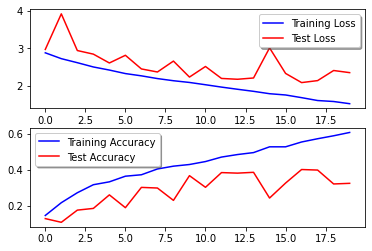

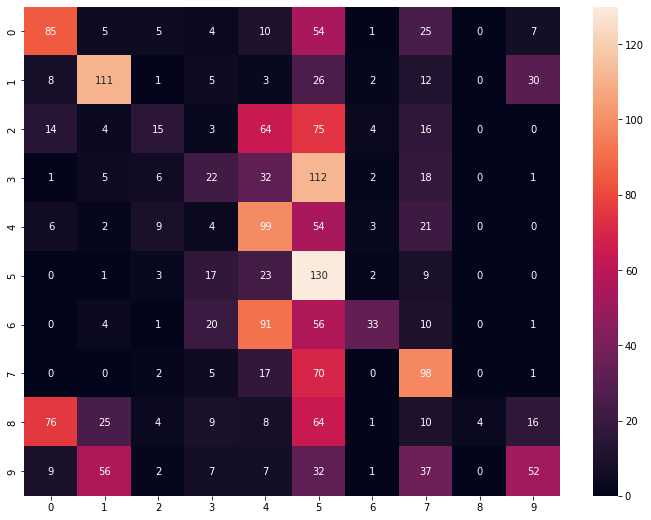

In [7]:
executor(define_seq_model_1(), x_train, y_train, x_test, y_test)

With the first model which is the simplest of the three, the model was fit for 20 epochs due to time constraints. Test accuracy and loss seem most optimized at around 15 epochs beyond which the results seem to deteriorate. Misclassifications are high with major classifications class 3.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


79/79 [==============================] - 2s 12ms/step - loss: 2.9237 - accuracy: 0.0976 - val_loss: 2.9099 - val_accuracy: 0.1035
Epoch 2/20
79/79 [==============================] - 1s 7ms/step - loss: 2.8971 - accuracy: 0.1300 - val_loss: 2.8855 - val_accuracy: 0.1275
Epoch 3/20
79/79 [==============================] - 1s 7ms/step - loss: 2.8628 - accuracy: 0.1684 - val_loss: 2.8430 - val_accuracy: 0.1490
Epoch 4/20
79/79 [==============================] - 1s 7ms/step - loss: 2.7966 - accuracy: 0.1884 - val_loss: 2.8097 - val_accuracy: 0.1105
Epoch 5/20
79/79 [==============================] - 1s 7ms/step - loss: 2.7248 - accuracy: 0.1924 - val_loss: 3.2285 - val_accuracy: 0.1175
Epoch 6/20
79/79 [==============================] - 1s 7ms/step - loss: 2.6560 - accuracy: 0.2232 - val_loss: 2.6389 - val_accuracy: 0.2225
Epoch 7/20
79/79 [==============================] - 1s 7ms/step - loss: 2.5865 - accuracy: 0.2408 - val_loss: 2.5888 - val_accuracy: 0.2240
Epoch 8/20
79/79 [============

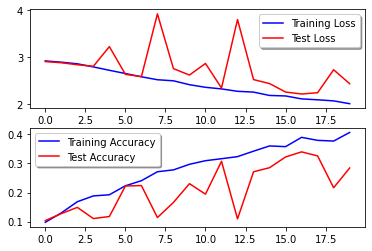

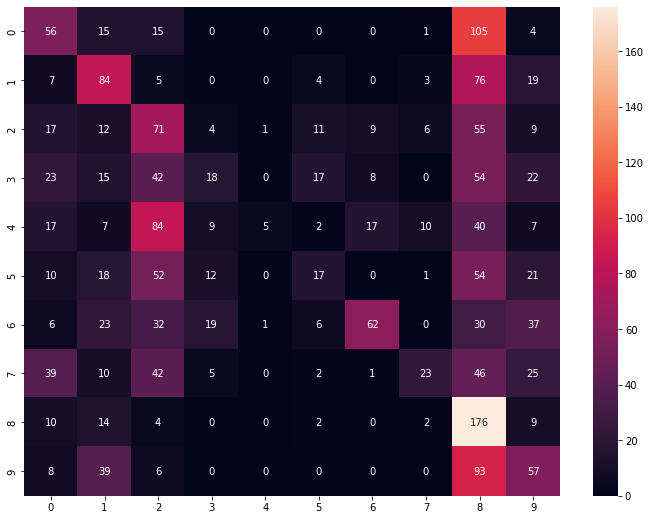

In [8]:
executor(define_seq_model_2(), x_train, y_train, x_test, y_test)

This model is a bit more complex with more layers with higher neurons. The results obtained are mildly better. The misclassifications are slightly lesser. Peak accuracy still comes in at around 15 epochs of runs. Classifications were varied across classes.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 109, 109, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 107, 107, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 105, 105, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 52, 52, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
79/79 [==============================] - 16s 176ms/step - loss: 2.9450 - accuracy: 0.1520 - val_loss: 4.0729 - val_accuracy: 0.0975
Epoch 2/20
79/79 [==============================] - 12s 152ms/step - loss: 2.8716 - accuracy: 0.2036 - val_loss: 3.3055 - val_accuracy: 0.1405
Epoch 3/20
79/79 [==============================] - 12s 153ms/step - loss: 2.7119 - accuracy: 0.2664 - val_loss: 2.6774 - val_accuracy: 0.2510
Epoch 4/20
79/79 [==============================] - 12s 154ms/step - loss: 2.5921 - accuracy: 0.2972 - val_loss: 3.0780 - val_accuracy: 0.2105
Epoch 5/20
79/79 [==============================] - 12s 157ms/step - loss: 2.5135 - accuracy: 0.3220 - val_loss: 2.5971 - val_accuracy: 0.2450
Epoch 6/20
79/79 [==============================] - 12s 157ms/step - loss: 2.4051 - accuracy: 0.3568 - val_loss: 2.6270 - val_accuracy: 0.2860
Epoch 7/20
79/79 [==============================] - 12s 157ms/step - loss: 2.3678 - accuracy: 0.3592 - val_loss: 2.5529 - val_accuracy: 0.3015

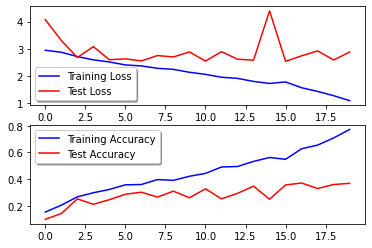

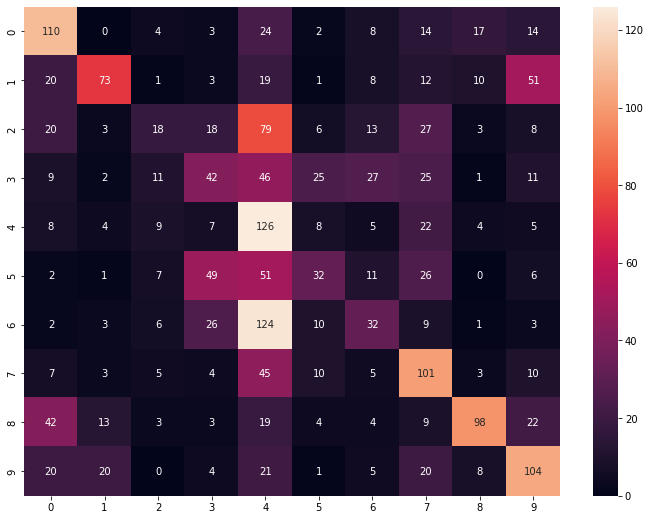

In [9]:
executor(define_seq_model_3(), x_train_resize, y_train, x_test_resize, y_test)

The most complex model of the three. Longer run times per epoch. Test accuracy shows improvements till the last epochs indicating more epochs might result in better accuracy.

Overall more images with the entire dataset needs to be used for enhancing the results.

End